# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

 Group name:  Team 6  
Created by Andrew Gong, Emily Lu (016261726), Ryuji Brioso, Ayman Rabia (018149261)  
Last updated: 9/28/2025  
Briefly describe your dataset:
The dataset contains video games that have solde more than 100,00 copies worldwide, collected form VGChartz.com. The key attributes include, Rank, Name, Platform, Year, Genre, Publisher, and Sales in different reagions, including NA, EU, JP and Others, as well as Global sales. The size is about 16,600 rows with ~11,000 independent rows,

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/global-video-game-sales",
  file_path
)

print(df.isna().sum(),'\n')
print(df.isnull().sum())
df.head()

/tmp/ipython-input-1055742183.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 381k/381k [00:00<00:00, 753kB/s]

Extracting zip of vgsales.csv...
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

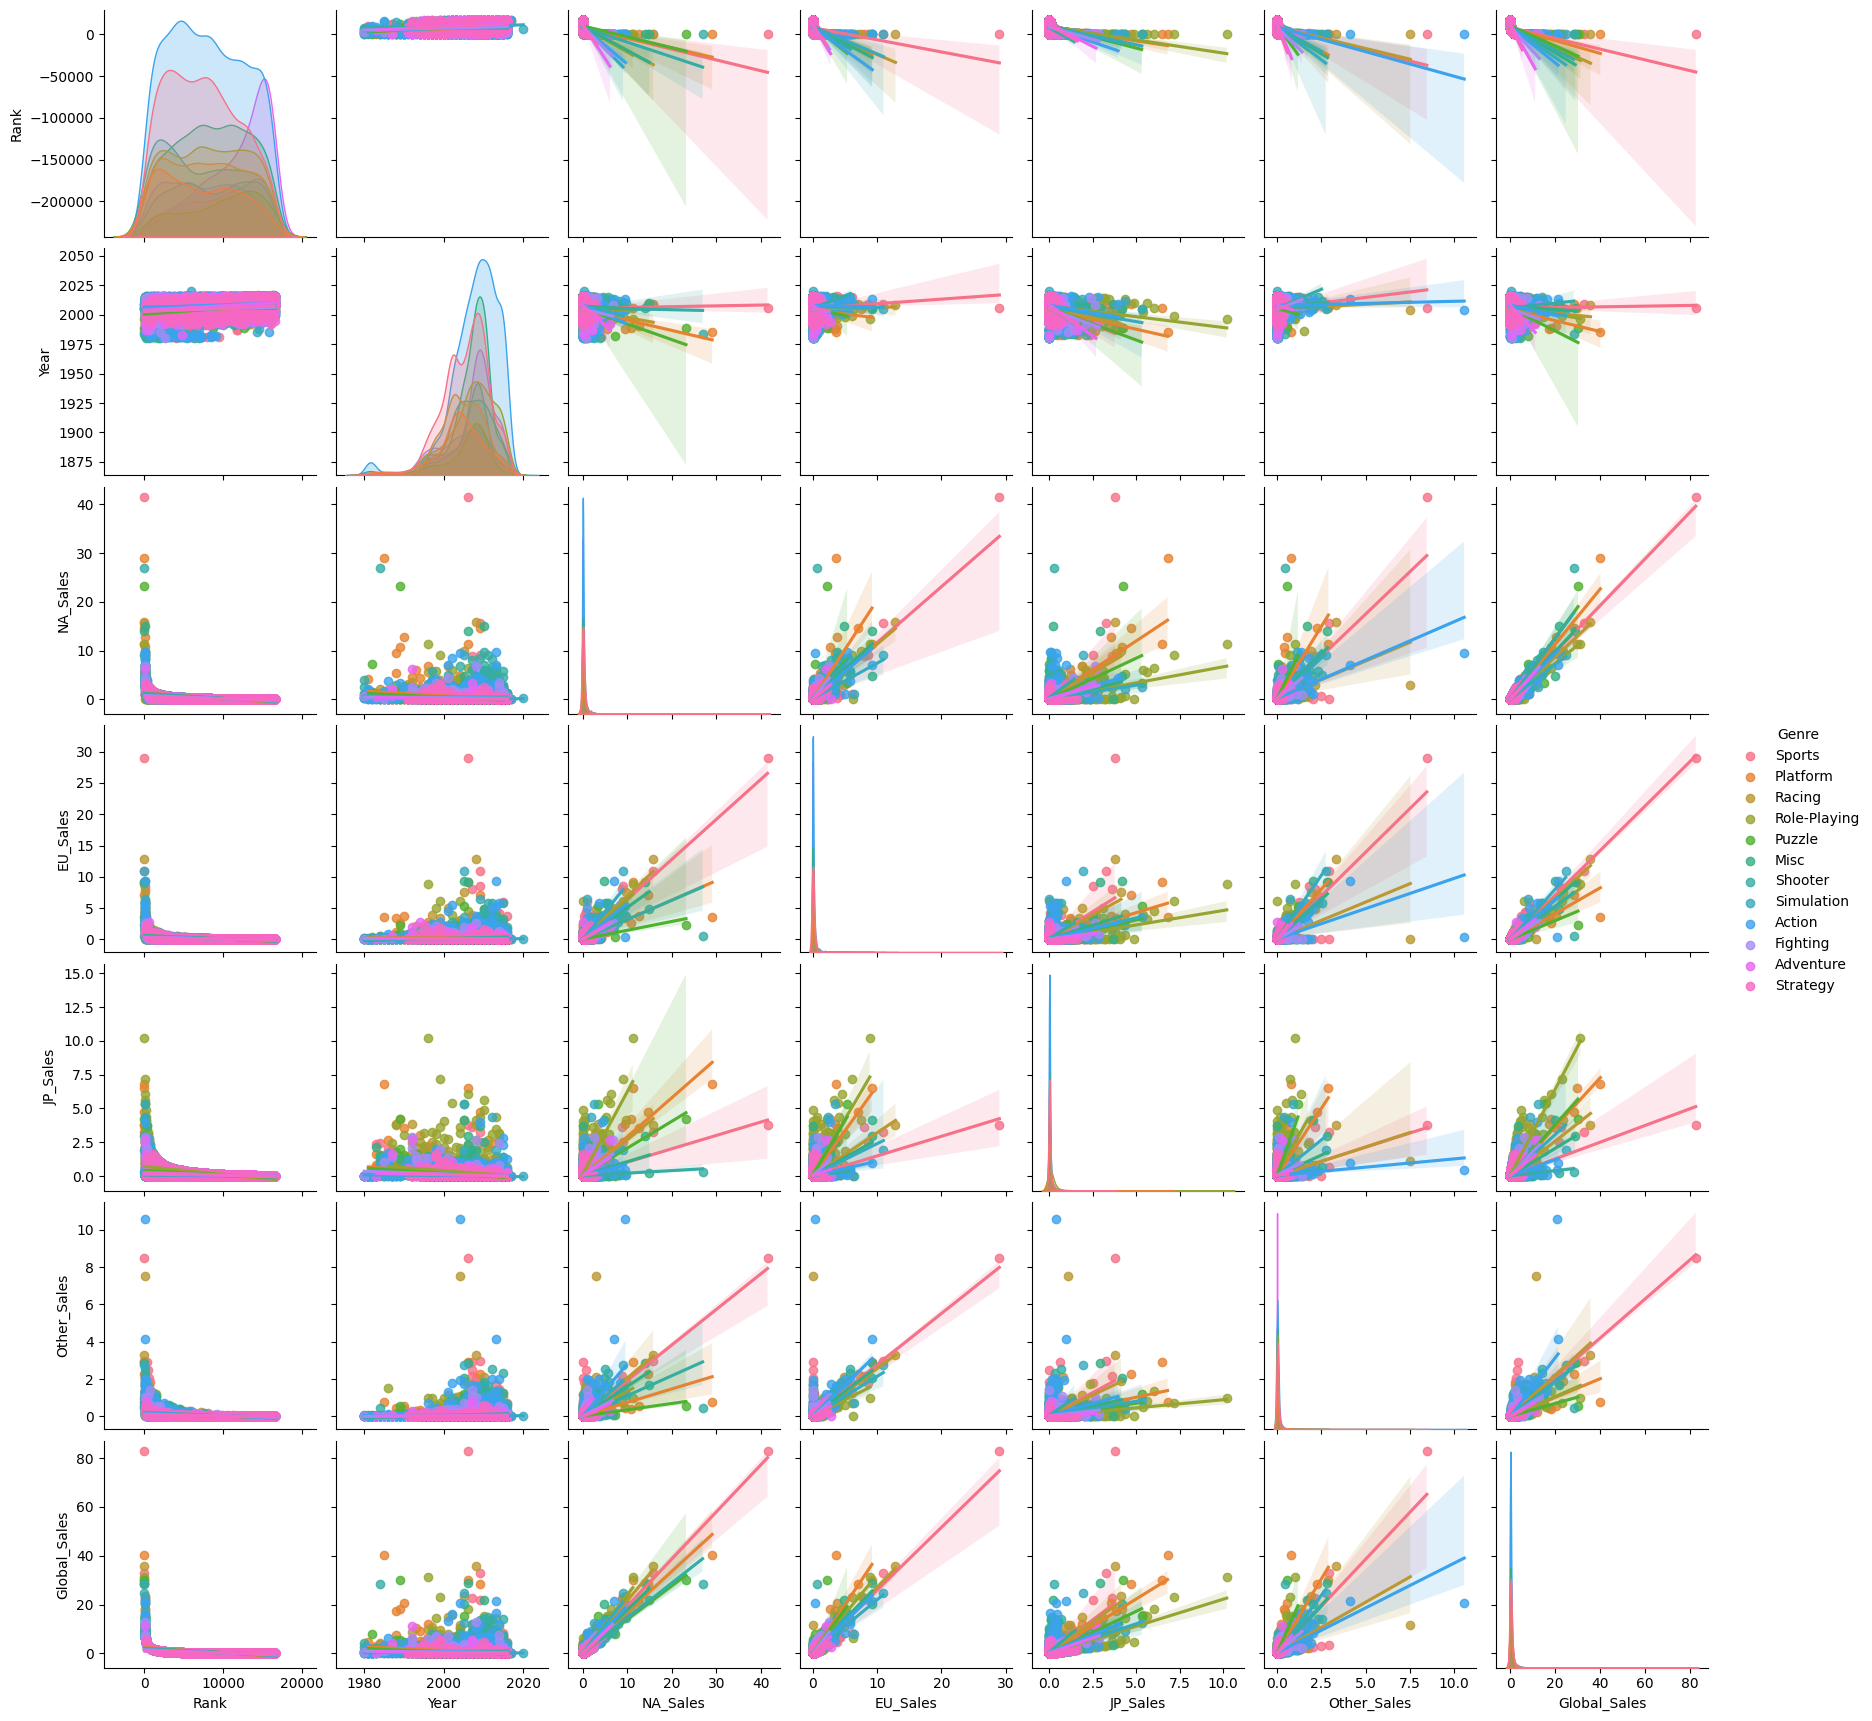

In [ ]:
# Your code here . . .
sns.pairplot(
  data=df,
  kind="reg",
  hue='Genre'
)
plt.title("Sales Metrics Pair Plot (Hue: Genre)")

### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.  

    
**Two features been chosen:**
- Global_Sales  
- NA_Sales  
This is because North America often contributes a large portion of game sales, so this can show how well NA_Sales predicts Global_Sales.

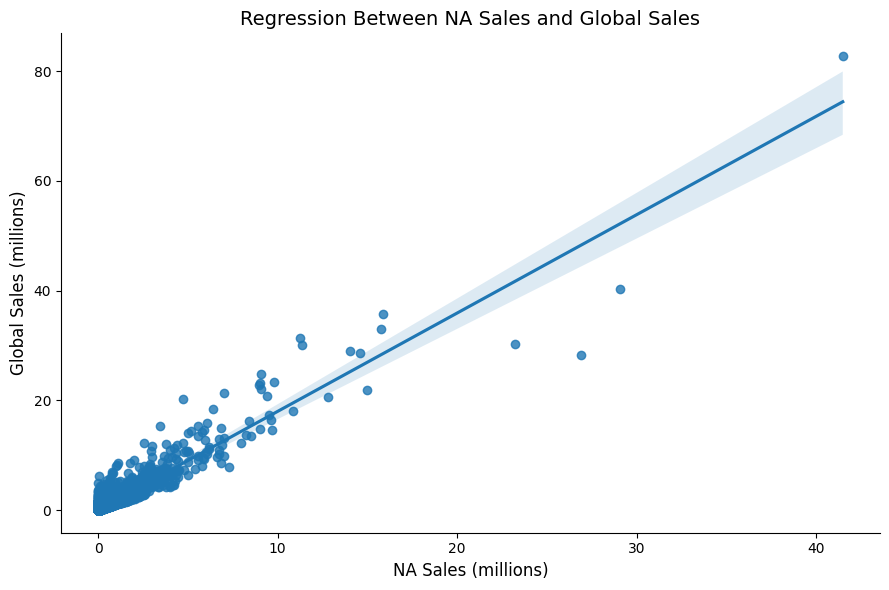

In [ ]:
# Your code here . . .
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[['NA_Sales', 'Global_Sales']].dropna()

# lmplot
sns.lmplot(x='NA_Sales', y='Global_Sales', data=df_filtered, height=6, aspect=1.5, ci=95)

# Title and labels
plt.title("Regression Between NA Sales and Global Sales", fontsize=14)
plt.xlabel("NA Sales (millions)", fontsize=12)
plt.ylabel("Global Sales (millions)", fontsize=12)
plt.tight_layout()
plt.show()


### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.  

**Features been chosen:**  
- EU_Sales
- Global_Sales  
- hue = Genre
- size = NA_Sales  
This shows trend between EU and global sales, the color of the hue help see which genres dominate, and the bubble sizes show contribution of NA sales to global sales



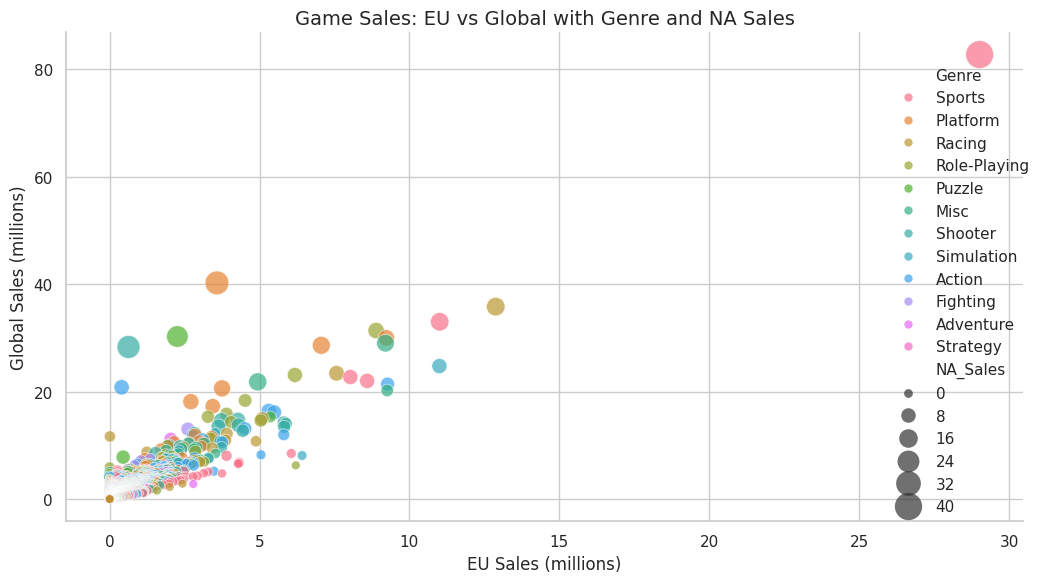

In [ ]:
# Your code here . . .
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[['EU_Sales', 'Global_Sales', 'Genre', 'NA_Sales']].dropna()

# relplot
sns.set(style="whitegrid")
sns.relplot(
    data=df_filtered,
    x='EU_Sales',
    y='Global_Sales',
    hue='Genre',
    size='NA_Sales',
    sizes=(40, 400),
    alpha=0.7,
    height=6,
    aspect=1.5
)

# Title and labels
plt.title("Game Sales: EU vs Global with Genre and NA Sales", fontsize=14)
plt.xlabel("EU Sales (millions)", fontsize=12)
plt.ylabel("Global Sales (millions)", fontsize=12)
plt.tight_layout()
plt.show()


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

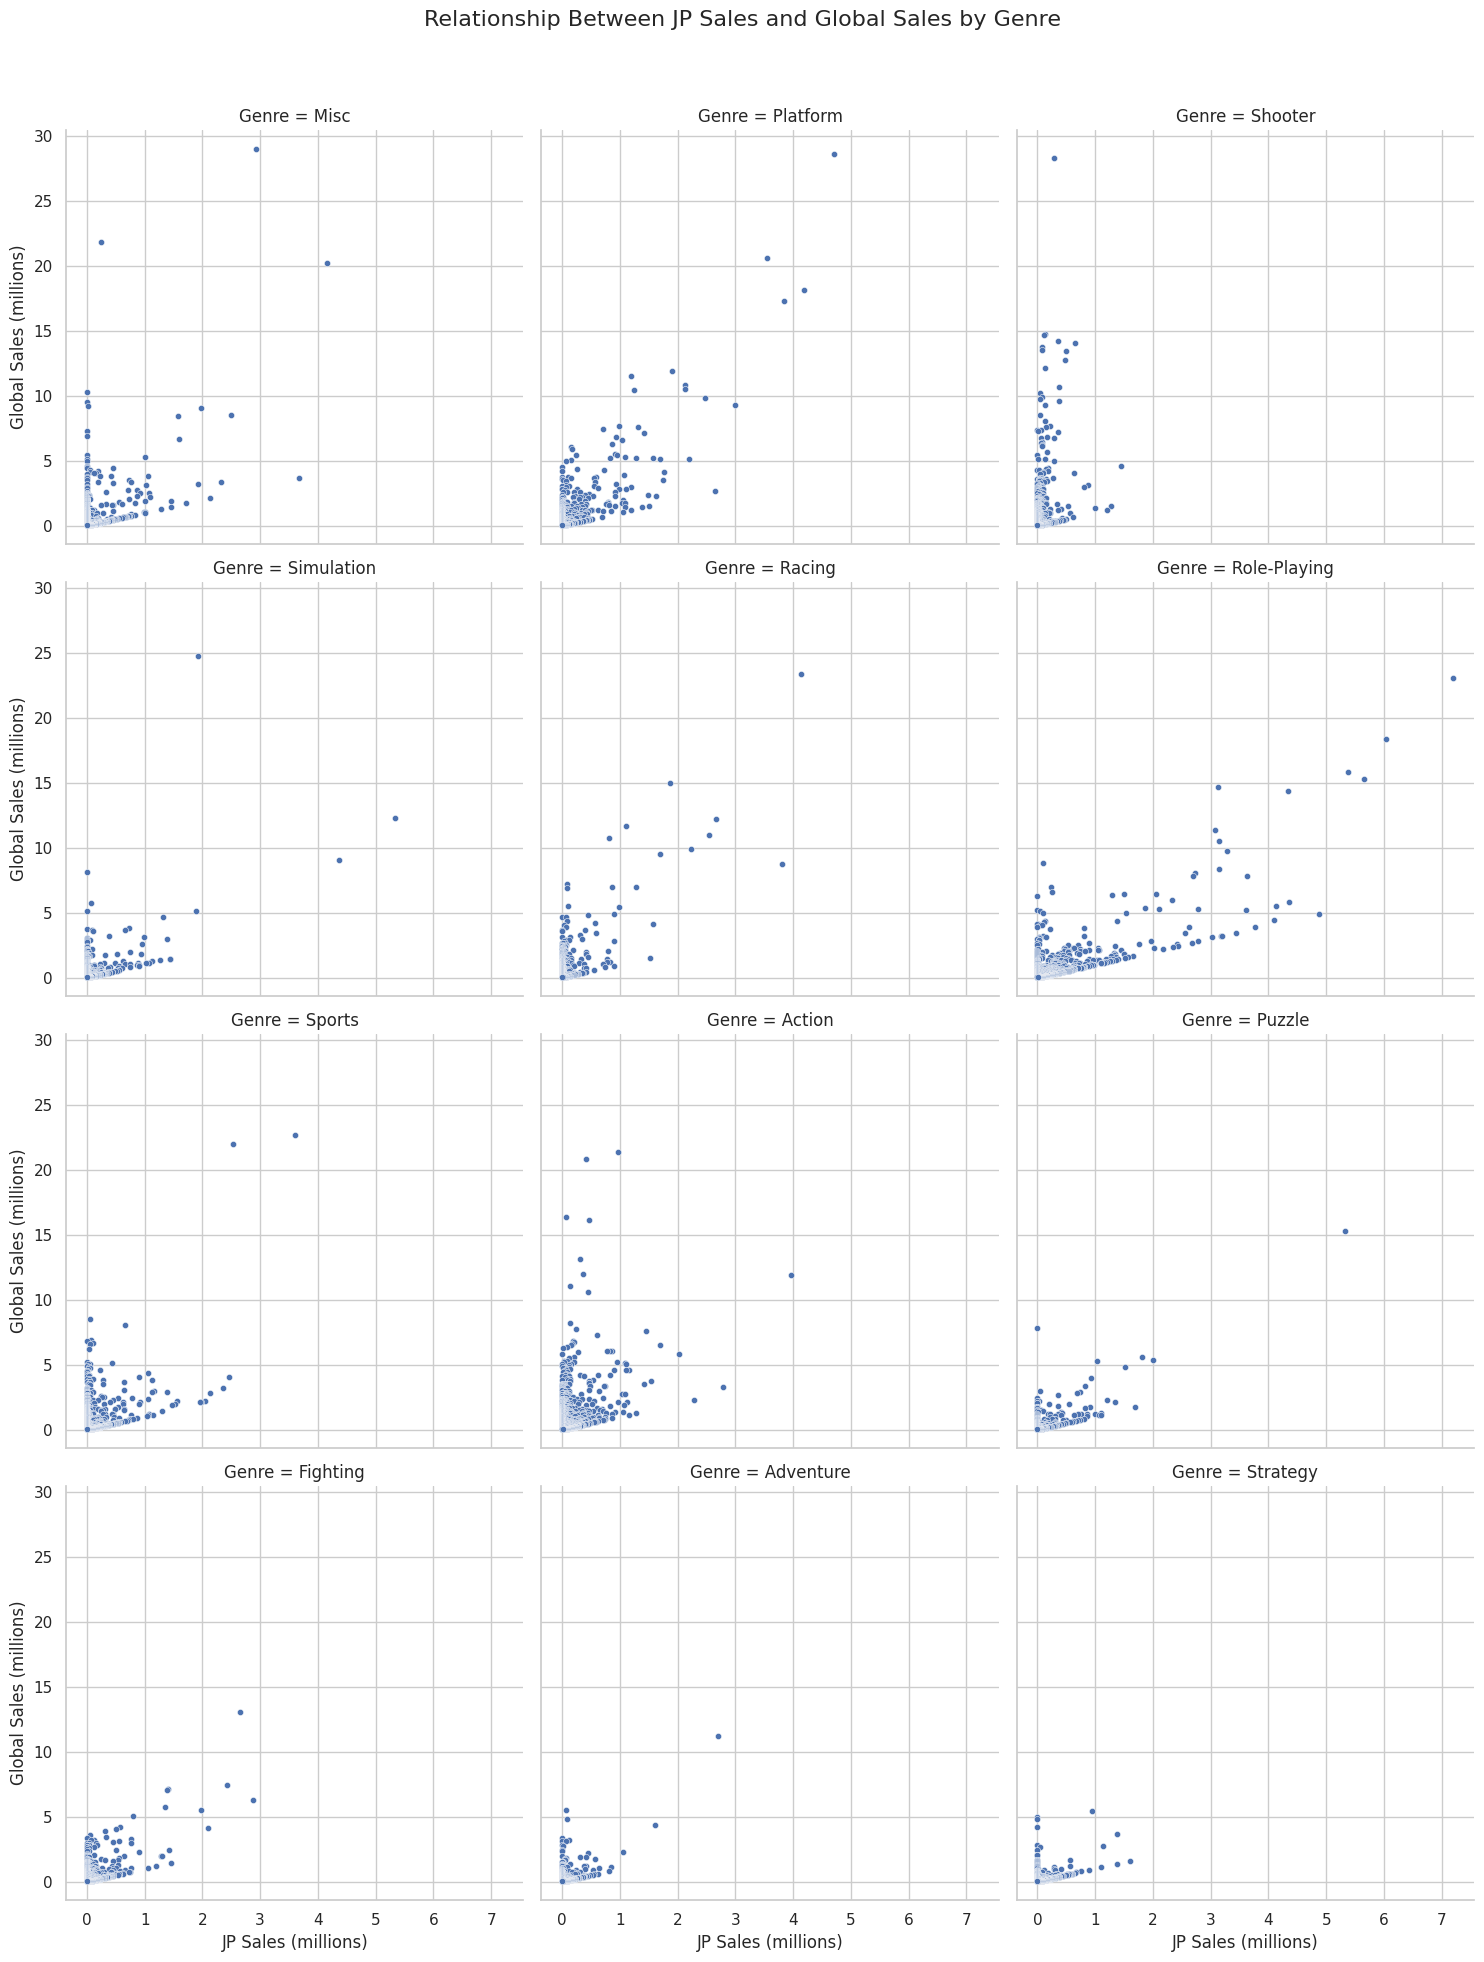

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[['JP_Sales', 'Global_Sales', 'Genre']].dropna()
df_filtered = df_filtered[(df_filtered['JP_Sales'] < 30) & (df_filtered['Global_Sales'] < 30)] # restrict the range of data for better visualization

# relplot
sns.set(style="whitegrid")
plot = sns.relplot(
    data=df_filtered,
    x="JP_Sales",
    y="Global_Sales",
    col="Genre",         # one plot per genre
    col_wrap=3,          # 3 plots per row
    height=5,            # height = 5
    s=20,                # size of data pt = 20
    kind="scatter"
)

# Add main title
plot.fig.suptitle("Relationship Between JP Sales and Global Sales by Genre", fontsize=16)
plot.set_axis_labels("JP Sales (millions)", "Global Sales (millions)")
plot.fig.subplots_adjust(top=0.92)  # make space for title

plt.show()
